In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [33]:
child_df = pd.read_csv('child_iq.csv')
child_df = child_df.iloc[:,1:]
child_df

,ppvt,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26
...,...,...,...
395,87,3,21
396,69,2,20
397,80,1,25
398,98,1,18


<AxesSubplot:xlabel='momage', ylabel='ppvt'>

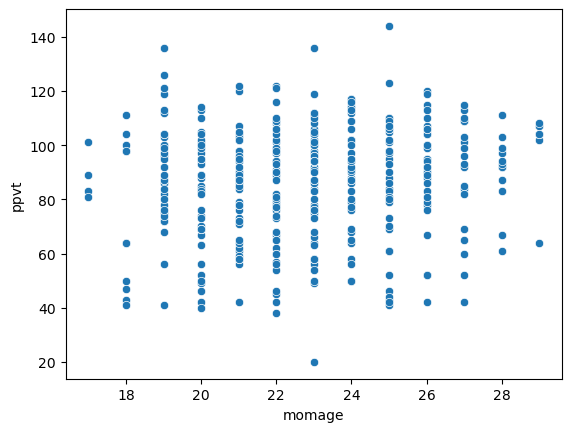

In [34]:
# see ppvt based on momamge using seaborn
sns.scatterplot(x = 'momage', y = 'ppvt', data = child_df)

<AxesSubplot:xlabel='educ_cat', ylabel='ppvt'>

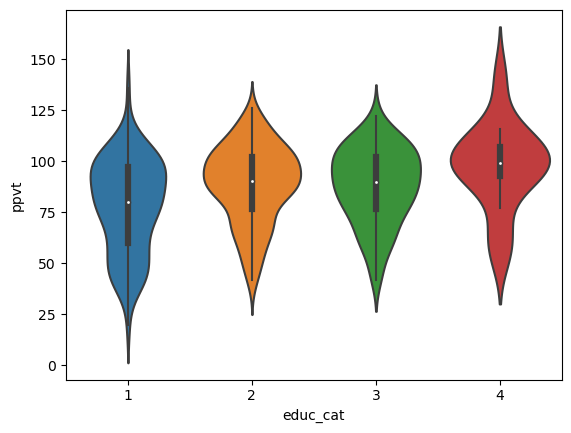

In [35]:
sns.violinplot(y = 'ppvt', x = 'educ_cat', data = child_df)

<AxesSubplot:xlabel='momage', ylabel='ppvt'>

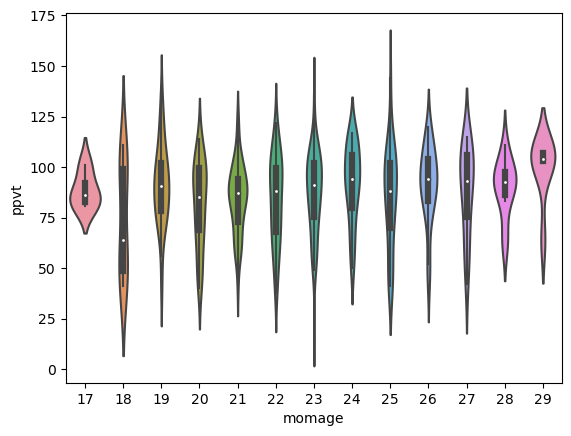

In [36]:
sns.violinplot(y = 'ppvt', x = 'momage', data = child_df)

In [37]:
gifted_df = pd.read_csv('gifted.csv')
gifted_df

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
0,159,115,117,18,26,1.9,3.00,2.00
1,164,117,113,20,37,2.5,1.75,3.25
2,154,115,118,20,32,2.2,2.75,2.50
3,157,113,131,12,24,1.7,2.75,2.25
4,156,110,109,17,34,2.2,2.25,2.50
5,150,113,109,13,28,1.9,1.25,3.75
6,155,118,119,19,24,1.8,2.00,3.00
7,161,117,120,18,32,2.3,2.25,2.50
8,163,111,128,22,28,2.1,1.00,4.00
9,162,122,120,18,27,2.1,2.25,2.75


In [38]:
gifted_df.describe()

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,159.138889,114.777778,118.166667,18.000000,30.694444,2.136111,1.958333,3.062500
std,4.630043,3.481470,6.504943,3.224903,4.314887,0.205847,0.559017,0.627851
min,150.000000,110.000000,101.000000,10.000000,21.000000,1.700000,0.750000,1.750000
25%,155.000000,112.000000,113.750000,17.000000,28.000000,2.000000,1.750000,2.687500
50%,159.000000,115.000000,118.000000,18.000000,31.000000,2.200000,2.000000,3.000000
75%,162.000000,116.250000,122.250000,20.000000,34.250000,2.300000,2.250000,3.500000
max,169.000000,126.000000,131.000000,23.000000,39.000000,2.500000,3.000000,4.500000


In [39]:
x = ['good', "great", "awesome", "best"]

gifted_df['categories'] = 'good'

In [40]:
# make category with x in categories column
gifted_df.loc[gifted_df['score'] <= 155, 'categories'] = 'good'
gifted_df.loc[(gifted_df['score'] > 155) & (gifted_df['score'] <= 160), 'categories'] = 'better'
gifted_df.loc[(gifted_df['score'] > 160) & (gifted_df['score'] <= 165), 'categories'] = 'better than better!'
gifted_df.loc[(gifted_df['score'] > 165) & (gifted_df['score'] <= 170), 'categories'] = 'BEST!!!'

In [41]:
gifted_df

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons,categories
0,159,115,117,18,26,1.9,3.00,2.00,better
1,164,117,113,20,37,2.5,1.75,3.25,better than better!
2,154,115,118,20,32,2.2,2.75,2.50,good
3,157,113,131,12,24,1.7,2.75,2.25,better
4,156,110,109,17,34,2.2,2.25,2.50,better
5,150,113,109,13,28,1.9,1.25,3.75,good
6,155,118,119,19,24,1.8,2.00,3.00,good
7,161,117,120,18,32,2.3,2.25,2.50,better than better!
8,163,111,128,22,28,2.1,1.00,4.00,better than better!
9,162,122,120,18,27,2.1,2.25,2.75,better than better!


In [42]:
gifted_df['categories'].value_counts()

better                 12
better than better!    10
good                   10
BEST!!!                 4
Name: categories, dtype: int64

<AxesSubplot:xlabel='categories', ylabel='count'>

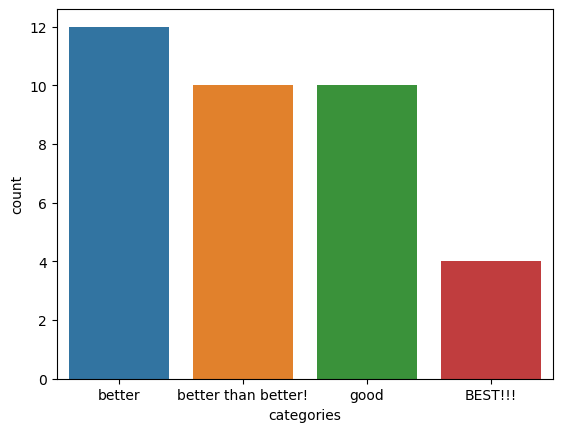

In [43]:
# plot count with seaborn
sns.countplot(x = 'categories', data = gifted_df)

<AxesSubplot:xlabel='motheriq', ylabel='fatheriq'>

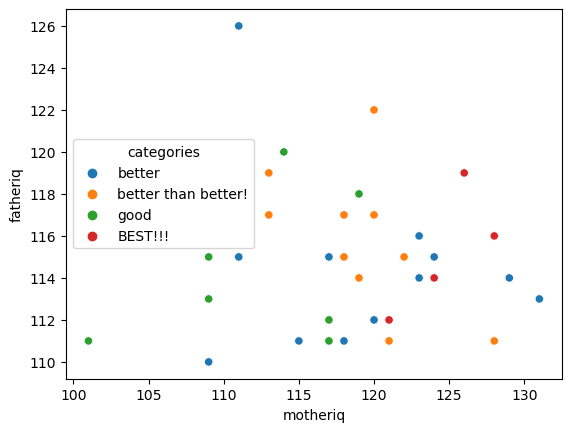

In [44]:
# plot mother iq and father iq with hue of categories
sns.scatterplot(x = 'motheriq', y = 'fatheriq', hue = 'categories', data = gifted_df)

In [45]:
gifted_df.corr()

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
score,1.000000,0.188081,0.571242,0.267891,0.544207,0.525197,-0.370260,0.245100
fatheriq,0.188081,1.000000,-0.024812,-0.030538,-0.075021,-0.068219,0.116222,-0.248351
motheriq,0.571242,-0.024812,1.000000,0.072185,0.024261,-0.043031,-0.329999,0.338418
speak,0.267891,-0.030538,0.072185,1.000000,0.059545,0.185071,-0.154524,0.109361
count,0.544207,-0.075021,0.024261,0.059545,1.000000,0.910252,-0.215679,0.154901
read,0.525197,-0.068219,-0.043031,0.185071,0.910252,1.000000,-0.166562,0.125734
edutv,-0.370260,0.116222,-0.329999,-0.154524,-0.215679,-0.166562,1.000000,-0.923437
cartoons,0.245100,-0.248351,0.338418,0.109361,0.154901,0.125734,-0.923437,1.000000


<AxesSubplot:>

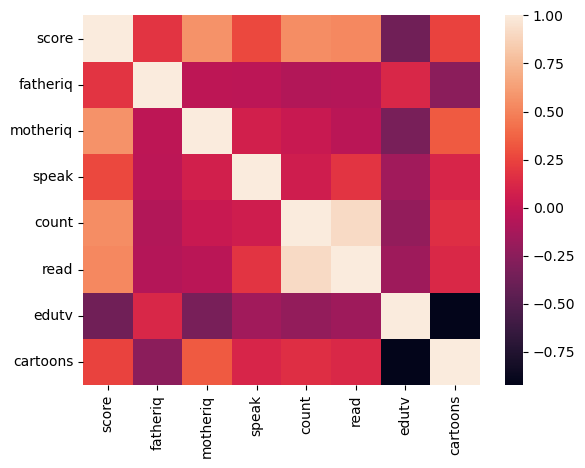

In [46]:
# make a collaration plot
sns.heatmap(gifted_df.corr())

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd

# Assuming you have the data in a pandas DataFrame called 'gifted_df' with columns 'mother_iq', 'father_iq', and 'score'

# # Example dataset
# data = {
#     'mother_iq': [100, 110, 95, 105, 98, 102, 120, 130],
#     'father_iq': [110, 108, 105, 99, 100, 104, 115, 125],
#     'score': [110, 115, 105, 103, 102, 106, 118, 125]
# }
# gifted_df = pd.DataFrame(data)

# Split the data into training and testing sets
X = gifted_df[['motheriq', 'fatheriq']]
y = gifted_df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    y_pred_class = (y_pred > 100).astype(int)
    accuracy = accuracy_score(y_test, y_pred_class)
    
    # Store the results
    results.append({
        'Model': name,
        'Mean Squared Error': mse,
        'Accuracy': accuracy
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


                      Model  Mean Squared Error  Accuracy
0         Linear Regression           11.236185       0.0
1             Decision Tree           49.000000       0.0
2             Random Forest           30.675250       0.0
3  Support Vector Regressor           14.382999       0.0


In [58]:
models['Linear Regression'].predict([[100, 200]])

/Users/angelasthingy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([179.0477012])